# TDI Challenge Questions

## Section 3

**Question**: You roll a fair 6-sided dice repeatedly until the sum of the dice rolls is greater than or equal to M. For all questions, give your answer to 5 decimal places.

**Solution**: 
Let's assume `M = 1`. This means that each and every number on the dice would be `>= M`. Therefore, the expected value of the sums would be simply the probablity of each dice face ($p_i = \frac{1}{6}$) time the number itself:
$<X>= \sum_i=1^{6}p_i*i = 3.5$

Now if `M = 2`, there are two possible scenarios:
1. roll of the dice returns a number `>= 2`: $<X_1>= \sum_{i=2}^{6}i\times p_i = 3.3333$, where $p_i = \frac{1}{6}$
2. First dice roll is 1 which is `< 2`, then the second roll that result in summation greater than 2 could be any of the numbers on the dice face. Therefore, the $<X_2>= \sum_{i=1}^{6}p_i(1+i) = 0.75$ where $p_i = \frac{1}{36}$ Code: `1.0/36*sum(range(2,8)) = 0.75`

Therefore, the final $<X> = <X_1> + <X_2>$ = 4.083333333333333

In [ ]:
import numpy as np 
import random
import sys
random.seed(1)

class RollSum():
    def __init__(self,ntrials, M):
        
        self.ntrials = ntrials
        self.M = M
        
        # store the sum of the rolls
        self.sum_dice_rolls = [] 
        
        # store the number of rolls per trial
        self.number_of_rolls = []
    
    def roll_dice(self):
        
        roll = True
        rolls_per_trial = 0
        
        trialsum = 0
        while roll:

            # keep track of number of rolls
            rolls_per_trial += 1

            # number on the dice
            dice = random.randint(1,6)

            # sum the numbers for each roll
            trialsum += dice

            # check the sum of the rolls against M
            if trialsum >= self.M:
                self.number_of_rolls.append(rolls_per_trial)
                roll = False
                
        self.sum_dice_rolls.append(trialsum) 
    
    def expected_value_calculator(self):
        
        for trial in range(self.ntrials):
            self.roll_dice()
            if (trial % 1000 == 0):
                sys.stdout.write("\rProgress: {} {}".format(trial,self.number_of_rolls[trial]))
            #sys.stdout.flush()
        
        # What is the mean of the sum minus M when M=20?
        answer_Q1 = np.mean(self.sum_dice_rolls) - self.M
        # What is the standard deviation of the sum minus M when M=20?
        answer_Q2 = np.std(self.sum_dice_rolls) - self.M
        # What is the mean of the number of rolls when M=20?
        answer_Q3 = np.mean(self.number_of_rolls)
        
        return np.round([answer_Q1,answer_Q2,answer_Q3],5)
    
roll = RollSum(100000,5000)
roll.expected_value_calculator()

## Section 2

With the rise of computer-aided police dispatch systems, many municipalities have large data sets on calls for service. These may include both calls from the public and from officers on patrol. Some cities provide this data to the public. New Orleans is one of these, with all of their Calls for Service data since 2011 available on their Open Data website.

For each of the questions below, use the New Orleans Calls for Service data sets from 2016 through 2020. The data can be found in New Orleans' Open Data portal. Each year comes as its own CSV file: 2016, 2017, 2018, 2019, 2020. A brief description of the data can be found here, for example.

**1. Start by considering just the data from 2020. Calls are classfied into several types. What fraction of calls are of the most common type?**

In [1]:
import pandas as pd
df = pd.read_csv('Call_for_Service_2020.csv',sep=',')
most_common_call = df['Type'].value_counts(ascending=False)
fraction_most_common_call = most_common_call[0]/most_common_call.values.sum()
print(fraction_most_common_call) # Answer: 0.23926753093150255

0.23926753093150255


**2. For this and the remaining questions, consider data from all five years. As you combine the data, you will notice that duplicate item numbers appear across years, for calls whose resolution spans the new year. Remove these duplicate rows. How many duplicate rows were removed?**

In [2]:
import glob

path = r'/Users/Mohammad/Research/TDI-Challenge/'
all_files = glob.glob(path + "/*.csv")

data_list = []
col_list = []
for file in all_files:
    df = pd.read_csv(file, sep=',',parse_dates=True, infer_datetime_format = True)
    col_list.append(df.columns)
    data_list.append(df)

# check for different column labels and match them with 2020 data
# Type_ -> Type
# TimeArrival -> TimeArrive
column2020 = col_list[0]
compare_col_list = []
for i in range(len(col_list)):
    check = col_list[i] == column2020
    if (False in check):
        pair_col_labels = zip(column2020.to_list(),col_list[i].to_list())
        a = list(pair_col_labels)
        a.sort()
        compare_col_list.append(a)

/Users/Mohammad/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.concat([data_list[0],
           data_list[1].rename(columns={'Type_':'Type'}),
           data_list[2].rename(columns={'Type_':'Type'}),
           data_list[3].rename(columns={'Type_':'Type'}),
           data_list[4].rename(columns={'TimeArrival':'TimeArrive'})
          ], axis = 0, ignore_index=True)

In [4]:
# Find number of duplicates
number_of_duplicates = df.duplicated(subset='NOPD_Item', keep='first').sum()
print(number_of_duplicates)
# remove the duplicate row based on items
df.drop_duplicates(subset=['NOPD_Item'],inplace=True)  # answer: 5724

5724


**3. Work out the average (mean) response time in each district. What is the difference between the average response times of the districts with the longest and shortest times?**

In [5]:
# convert the times into pandas timestamp
time_arrive = pd.to_datetime(df['TimeArrive'], format="%m/%d/%Y %H:%M:%S %p")
time_dispatch = pd.to_datetime(df['TimeDispatch'], format="%m/%d/%Y %H:%M:%S %p")
# create a new column for response time in the original dataframe (df)
response_time = time_arrive - time_dispatch
# response_time = response_time.fillna(pd.Timedelta(seconds=0))
response_time.name = 'ResponseTime'

data = pd.concat([df,response_time],axis = 1)
data['ResponseTime'] = data['ResponseTime'].apply(lambda x: x.total_seconds())

# average (mean) response time in each district.
grbyPD = data.groupby('PoliceDistrict')['ResponseTime'].mean()

# difference between the average response times of the districts with the longest and shortest times
diff_RP_time = grbyPD.max() - grbyPD.min()
print(diff_RP_time) # answer 583.4775839472238

583.4775839472238


**4. We can define surprising event types as those that occur more often in a district than they do over the whole city. What is the largest ratio of the conditional probability of an event type given a district to the unconditional probability of that event type? Consider only events types which have more than 100 events. Note that some events have their locations anonymized and are reported as being in district "0". These should be ignored.**

In [6]:
grby_PD_Type = data.groupby(['PoliceDistrict','Type'])
byPDType = grby_PD_Type.apply(lambda x: x['NOPD_Item'].count()).reset_index(name="Type_Count")

# remove the PoliceDistric = 0
byPDType = byPDType[byPDType['PoliceDistrict'] !=0]

# select events count > 100
byPDType = byPDType[byPDType['Type_Count'] > 100]

# probability of an event type
total_number_of_event_types = byPDType['Type_Count'].sum()
byPDType['ProbType'] = byPDType['Type_Count']/total_number_of_event_types

# calculating the conditional prob of an event for a given district
district_counts = byPDType.groupby('PoliceDistrict')['Type'].count().values
number_of_types_per_district = byPDType.groupby('PoliceDistrict').apply(lambda x: x['Type_Count'].sum()).values

number_of_types_per_district = [item for item, count in zip(list(number_of_types_per_district), list(district_counts)) for i in range(count)]
    
byPDType['perDistrict_Count'] = number_of_types_per_district

# conditional prob caluclation
byPDType['ProbType_wDistrictCond'] = byPDType['Type_Count']/byPDType['perDistrict_Count']

#calculate the ratio 
byPDType['Ratio'] = byPDType['ProbType_wDistrictCond'] / byPDType['ProbType']

print(byPDType['Ratio'].max()) # answer: 10.69861596423761

10.69861596423761


**5. Now compare to the data from 2016. Find the call type that displayed the largest percentage decrease in volume between 2016 and 2020. What is the fraction of the 2016 volume that this decrease represents? The answer should be between 0 and 1. (Note that the name of the type column changes over time. You can use the TypeText column, which remains constant, to determine the call type.)**

In [9]:
data_20 = data_list[0]
data_16 = data_list[2].rename(columns={'Type_':'Type'})
TypeVol_20 = data_20.groupby('Type')['NOPD_Item'].count()
TypeVol_16 = data_16.groupby('Type')['NOPD_Item'].count()

# We are measuring changes realtive to 2016 data
# + means increase in call volume 
# - means decrease in call volume
# We are lookig for the biggest negative
changeVol = TypeVol_20 - TypeVol_16

# largest decrease in call volume from 2016 to 2020
call_type = changeVol[changeVol==changeVol.min()].index[0]

# fraction of this call type in 2011 call volume
frac = TypeVol_16[TypeVol_16.index == call_type].values[0]/TypeVol_16.sum()
print(frac) #answer: 0.24501437898144343

0.24501437898144343


**6. Some calls result in an officer being dispatched to the scene, and some log an arrival time. What is the median response time (dispatch to arrival), in seconds, considering only valid (i.e. non-negative) times?**

In [32]:
data['ResponseTime'][data['ResponseTime'] > 0 ].median() # answer: 311.0

311.0

**7. Work out the average response time for each month. Make an ordinary least-squares fit to the response time against month. What is the slope of this line, in seconds per year?**

<ipython-input-43-ff52e840933f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ResponseTime_Month.dropna(inplace=True)


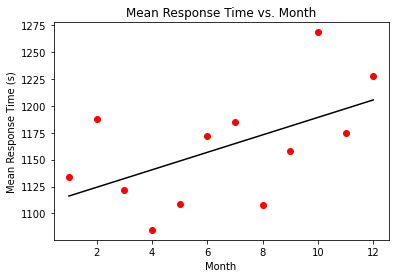

array([[97.37129784]])

In [43]:
data['TimeDispatch'] = pd.to_datetime(data['TimeDispatch'], format="%m/%d/%Y %H:%M:%S %p")
data['TimeDispatch'] = data['TimeDispatch'].dropna()
data['Month_Only'] = data['TimeDispatch'].dt.month
ResponseTime_Month  = data[['ResponseTime','Month_Only']]
ResponseTime_Month.dropna(inplace=True)
ResponseTime_Month = ResponseTime_Month[ResponseTime_Month['ResponseTime'] >0]
MeanResponseTime_vs_Month = ResponseTime_Month.groupby('Month_Only').mean()
X = MeanResponseTime_vs_Month.index.values
X = X.reshape(len(X),1)
Y = MeanResponseTime_vs_Month.values
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X, Y)
plt.scatter(X,Y,color='red')
plt.plot(X,regressor.predict(X),color='black')
plt.title("Mean Response Time vs. Month")
plt.xlabel("Month")
plt.ylabel("Mean Response Time (s)")
plt.show() 
regressor.coef_*12 # answer: 97.37130

**6. We can use the call locations to estimate the areas of the police districts. Represent each as an ellipse with semi-axes given by a single standard deviation of the longitude and latitude. What is the area, in square kilometers, of the largest district measured in this manner?**

In [138]:
import re
data['Location'] = data['Location'].apply(lambda x: re.findall(r'[-+]?([0-9]*\.[0-9]+|[0-9]+)',str(x)))
data['Location'] = data['Location'].apply(lambda x: list(map(float,x)))
data[['Longitude','Lattitude']] = pd.DataFrame(data['Location'].tolist(), index= data.index)
selected = data[['PoliceDistrict','Longitude','Lattitude']].dropna()
grby_PD = selected.groupby('PoliceDistrict')
distric_area = grby_PD[['Longitude','Lattitude']].std().eval('Longitude*Lattitude')
lattitude_to_km  = 111. # Radius of earth multiply by 1*pi/180
longitude_to_km = 96 # based on the NewOrleans coordinates
largest_distric_area = distric_area.max()*lattitude_to_km*longitude_to_km*np.pi
print(largest_distric_area) 
#answer: 2413.52736 It is very large !!!!




24135273.65108875
